# Average Speed of Answer, Average Handling Time, and After Call Work for Field Support Center
<em>Chris Rucker, Associate Data Scientist</em>

<em>14 Nov 2016</em>

## coefficients

Three discrete quantitative variables were chosen for exploration from a data set of 42 observations from the Field Support Center's CS Monthly Flash reports. 

The coefficients chosen are Average Handling Time (AHT), Average Speed of Answer (ASA), and After Call Work (ACW). 

I'd like to give special thanks to Roni for pulling the data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [29]:
data = pd.read_csv('C:\Users\crucker\calls.csv')
data.head()

,date,calls offered to queue,sales,retention,AHT,ACW,ASA
0,1,548792,71442,61461,346,9,33
1,2,579488,67364,65161,349,9,24
2,3,607728,69317,71092,348,9,22
3,4,662836,77384,76004,355,9,36
4,5,610952,70745,66888,356,10,33


In [3]:
data.shape

(42, 7)

In [4]:
data.columns

Index([u'date', u'calls offered to queue', u'sales', u'retention', u'AHT',
       u'ACW', u'ASA'],
      dtype='object')

## coefficientsCorrelation

Pairwise correlation of columns, excluding NA/null values.

In [32]:
data.corr()

,date,calls offered to queue,sales,retention,AHT,ACW,ASA
date,1.000000,0.193481,0.332501,-0.525588,-0.045132,-0.765642,0.357740
calls offered to queue,0.193481,1.000000,0.879293,0.553728,0.439359,-0.273361,0.619139
sales,0.332501,0.879293,1.000000,0.292528,0.343216,-0.322397,0.654282
retention,-0.525588,0.553728,0.292528,1.000000,0.353476,0.203702,0.105610
AHT,-0.045132,0.439359,0.343216,0.353476,1.000000,-0.095778,0.774291
ACW,-0.765642,-0.273361,-0.322397,0.203702,-0.095778,1.000000,-0.478790
ASA,0.357740,0.619139,0.654282,0.105610,0.774291,-0.478790,1.000000


## coefficientsDescribe

Generate various summary statistics, excluding NaN values.

In [5]:
data.describe()

,date,calls offered to queue,sales,retention,AHT,ACW,ASA
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,21.500000,615256.666667,76521.047619,63952.142857,360.500000,7.619048,61.523810
std,12.267844,47919.945308,8963.598482,6503.555784,11.387306,2.594106,36.262753
min,1.000000,499017.000000,63305.000000,46775.000000,343.000000,0.000000,22.000000
25%,11.250000,579267.500000,68897.750000,59905.000000,350.500000,7.000000,34.250000
50%,21.500000,610644.500000,75486.000000,63801.000000,357.500000,8.000000,50.500000
75%,31.750000,645297.500000,82598.250000,67179.750000,368.750000,9.000000,76.500000
max,42.000000,714228.000000,97835.000000,77485.000000,383.000000,10.000000,164.000000


## coefficientsAHT

Average Handling Time is the amount of time it takes an Agent to deal with all aspects of a call including talk time plus After Call Work increases.

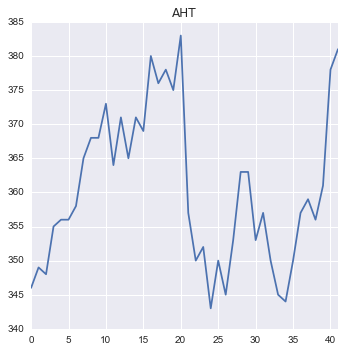

In [44]:
data.AHT.plot(figsize=(5.5,5.5), title='AHT')
plt.savefig('AHT.png', bbox_inches='tight')

## coefficientsACW

After Call Work is the period of time immediately after contact with the customer is completed and any supplementary work is undertaken by the Agent.

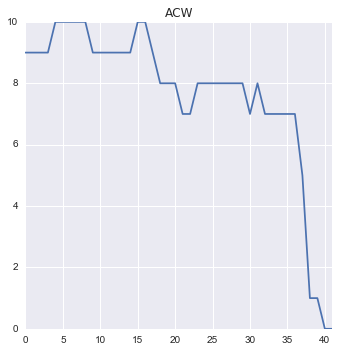

In [39]:
data.ACW.plot(figsize=(5.5,5.5), title='ACW')
plt.savefig('ACW.png', bbox_inches='tight')

## coefficientsASA

Average Speed of Answer is the amount of time it takes to answer a typical call once it has been routed to the Field Support Center.

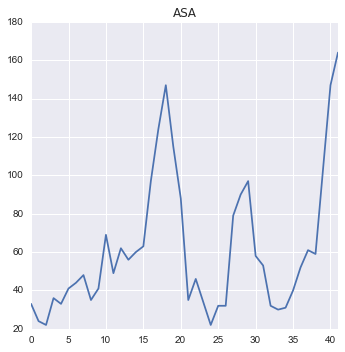

In [40]:
data.ASA.plot(figsize=(5.5,5.5), title='ASA')
plt.savefig('ASA.png', bbox_inches='tight')

## coefficientsPairplot

Pairplot showing interactions amongst AHT, ACW, and ASA variables.

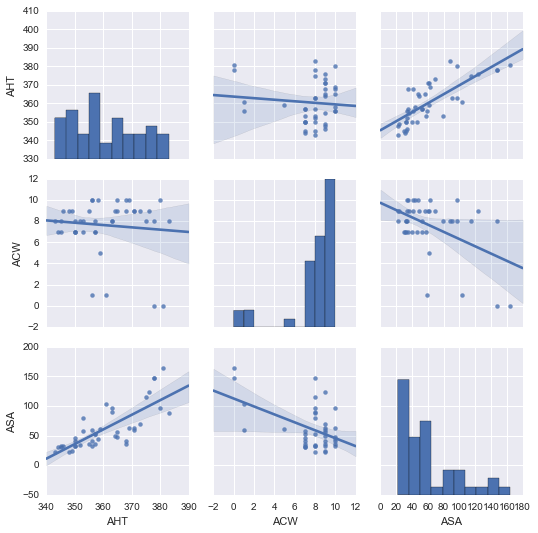

In [59]:
import seaborn
import seaborn as sns
seaborn.pairplot(data, vars=['AHT', 'ACW', 'ASA'], kind='reg')  

## coefficientsAHT/ASA

<em><b>As the amount of time it takes to answer a typical call once it has been routed to the Field Support Center increases, the amount of time it takes an Agent to deal with all aspects of a call including talk time plus After Call Work increases.</b></em> 

A bivariate distribution of ASA/AHT variables along with the univariate (or marginal) distribution of each on separate axes shows a Pearson correlation coefficient of 0.77 and a p-value of 1.8e-09. The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so. Positive correlations imply that as AHT increases, so does ASA. 

An altogether different approach is to fit a nonparametric regression using a lowess smoother. This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all.

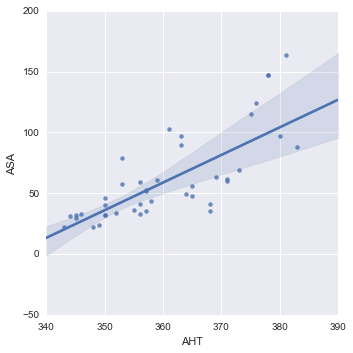

In [60]:
seaborn.lmplot(x='AHT', y='ASA', data=data, robust=True)  

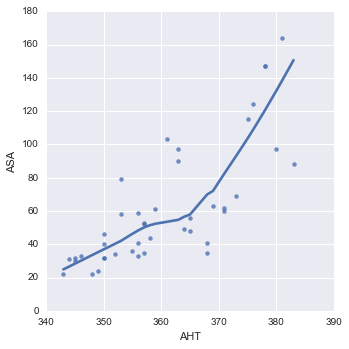

In [24]:
seaborn.lmplot(x='AHT', y='ASA', data=data, lowess=True)  

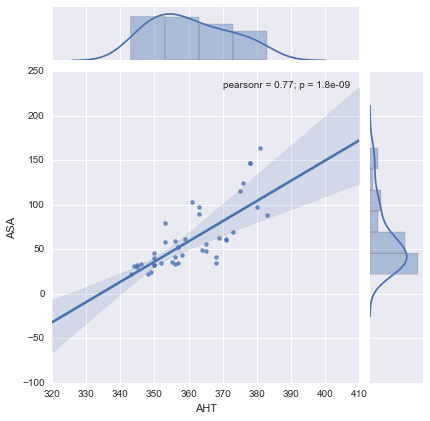

In [25]:
sns.jointplot(x='AHT', y='ASA', data=data, kind="reg", robust=True);

## coefficientsASA/ACW

<em><b>As the period of time immediately after contact with the customer is completed and any supplementary work is undertaken by the Agent decreases, the amount of time it takes to answer a typical call once it has been routed to the FSC decreases.</b></em> 

A bivariate distribution of ACW/ASA variables along with the univariate (or marginal) distribution of each on separate axes shows a Pearson correlation coefficient of -0.48 and a p-value of 0.0013. The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so. Negative correlations imply that as ASA increases, ACW decreases. 

An altogether different approach is to fit a nonparametric regression using a lowess smoother. This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all.

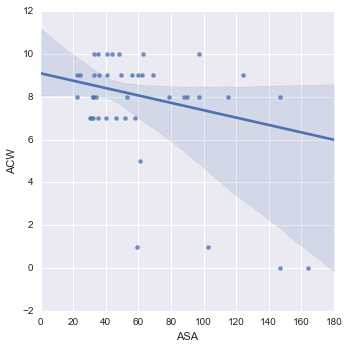

In [26]:
seaborn.lmplot(x='ASA', y='ACW', data=data, robust=True)  

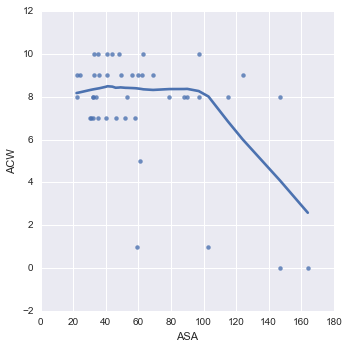

In [27]:
seaborn.lmplot(x='ASA', y='ACW', data=data, lowess=True)  

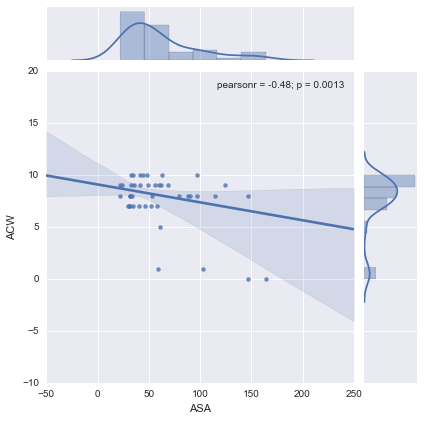

In [28]:
sns.jointplot(x='ASA', y='ACW', data=data, kind="reg", robust=True);

## coefficientsAHT/ACW

<em><b>As the period of time immediately after contact with the customer is completed and any supplementary work is 
undertaken by the Agent decreases, the amount of time it takes an Agent to deal with all aspects of a call increases.</b></em> 

A bivariate distribution of AHT/ACW variables along with the univariate (or marginal) distribution of each on separate axes shows a Pearson correlation coefficient of -0.096 and a p-value of 0.55. The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so. Negative correlations imply that as AHT increases, ACW decreases. 

An altogether different approach is to fit a nonparametric regression using a lowess smoother. This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all.

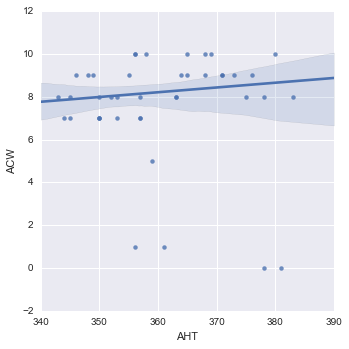

In [29]:
seaborn.lmplot(x='AHT', y='ACW', data=data, robust=True) 

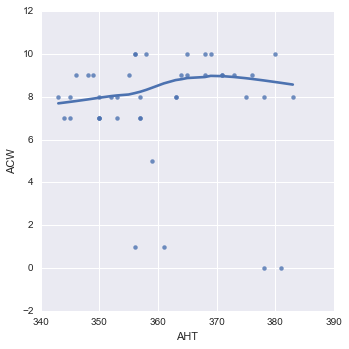

In [30]:
seaborn.lmplot(x='AHT', y='ACW', data=data, lowess=True) 

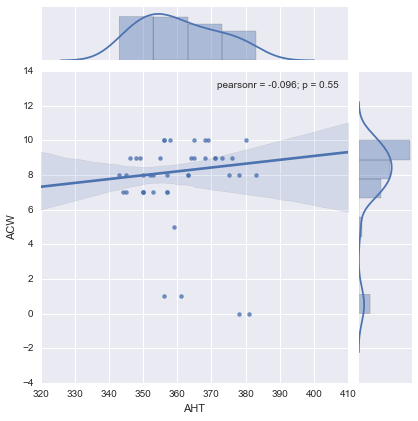

In [31]:
sns.jointplot(x='AHT', y='ACW', data=data, kind="reg", robust=True);

## coefficientsOutcome

<b>As the amount of time it takes to answer a typical call once it has been routed to the FSC increases, the amount of time it takes an Agent to deal with all aspects of a call including talk time plus After Call Work (ACW) increases.</b>

<b>As the period of time immediately after contact with the customer is completed and any supplementary work is undertaken by the Agent decreases, the amount of time it takes to answer a typical call once it has been routed to the FSC decreases.</b>

<b>As the period of time immediately after contact with the customer is completed and any supplementary work is 
undertaken by the Agent decreases, the amount of time it takes an Agent to deal with all aspects of a call increases.</b>